# 6-21-2019: Notebook for generating plots suggested by C Rowe exam report

In [1]:
%autoreload 2
%matplotlib notebook

import numpy as np
import seaborn as sns

from glob import glob
from collections import Counter
from obspy import read_events, UTCDateTime
from plot_detections import family_stack_plot

FMC files not on your path
HashPy not installed in this env
Probably on the server, no sklearn for you
HashPy not installed in this env, fool.
MTfit not installed in this env, fool


In [2]:
cat_Rot = read_events('/home/chet/GrowClust/Mercury/Final_catalogs_3-19-19/Rotokawa_Catalog_Final_5-17-19.xml')

Make list of unique template names in the catalog

In [3]:
temps = list(set([ev.resource_id.id.split('/')[-1].split('_')[0] for ev in cat_Rot]))

Make dictionary of events, keyed to template name

In [4]:
fam_dict = {temp: [ev for ev in cat_Rot
                   if ev.resource_id.id.split('/')[-1].split('_')[0] == temp]
            for temp in temps}

Print families with detection value - threshold gaps >0.33 (1-sigma average gap for all events) and chose one to plot.

2013sora307034 26
2014sora696959 39
2013sora949779 61
2013sora949736 23
2013sora497288 41
2014sora599707 26
2012sora477468 27
2014sora050115 31
2014sora218855 32
2012sora915942 110
2015sora331072 21
2013sora852741 36
2012sora642992 22
2014sora050144 29
2012sora382394 26
2013sora934002 25
2015sora025423 25
2014sora010105 143
2014sora452930 50
2014sora583896 30
2014sora050140 26
2012sora721033 25
2013sora742349 29
2012sora975458 22
2012sora743590 25
2014sora550241 31
2014sora298929 46
2013sora652465 24
2013sora455868 69
2014sora936543 24
2013sora124676 41
2012sora730811 24
2014sora344113 21
2015sora082571 55
2015sora349524 30
2012sora873488 24
2013sora257329 30
2013sora973090 21
2014sora107336 22
2012sora599996 21
2015sora289456 23
2013sora113393 45
2014sora309131 23
2013sora652378 34
2015sora436179 58
2013sora652521 42
Std of average detection gap per family: 0.32967647332461886


<IPython.core.display.Javascript object>


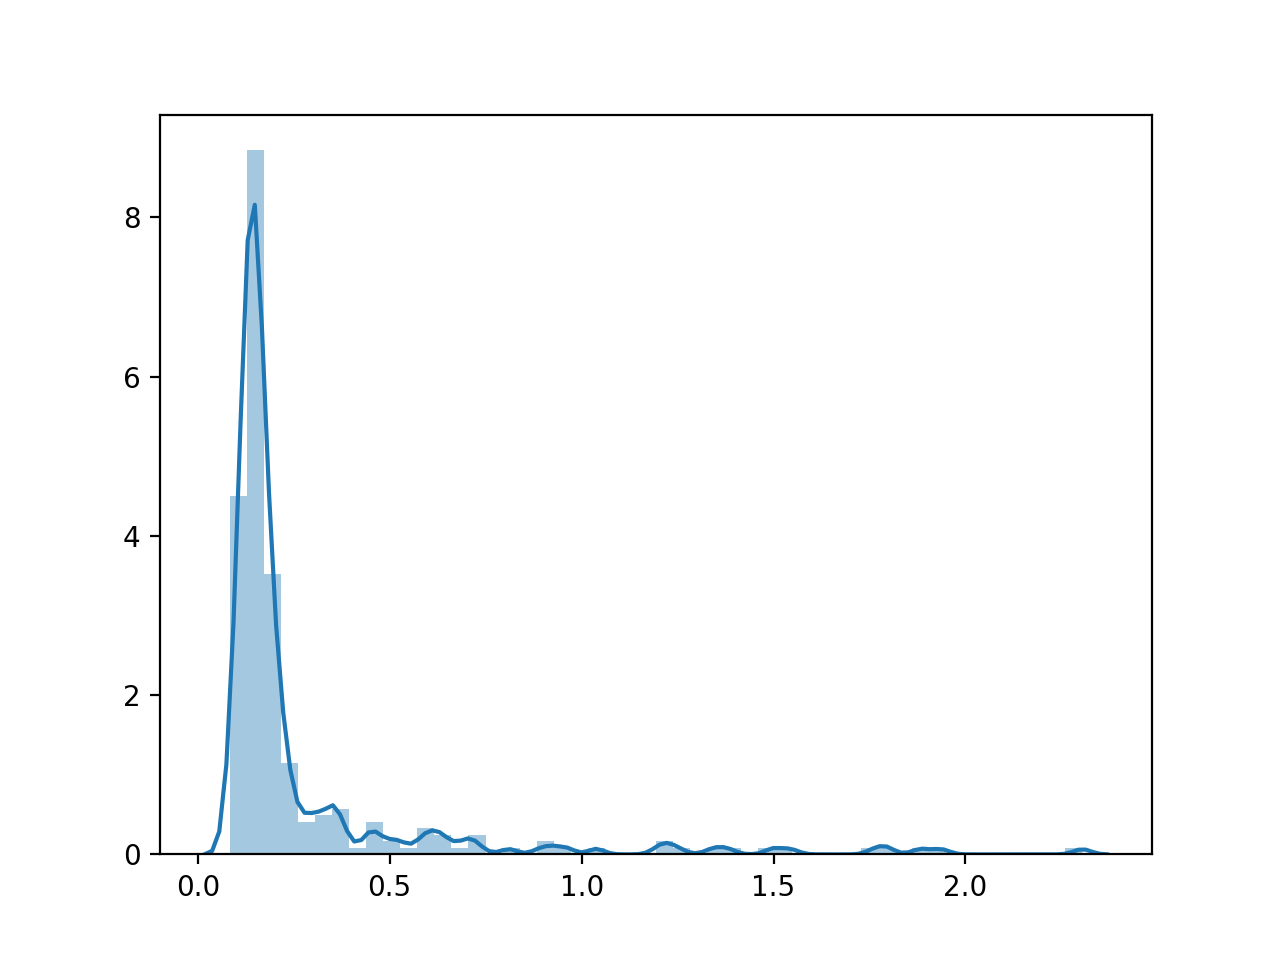

In [5]:
av_det_gaps = []
for temp, evs in fam_dict.items(): 
    if len(evs) > 20: 
        av_det_vals = [] 
        av_thresh_vals = [] 
        for ev in evs: 
            if len(ev.comments) > 1:
                dv = float(ev.comments[1].text.split('=')[-1])
                tv = float(ev.comments[0].text.split('=')[-1])
                av_det_vals.append(np.abs(dv))
                av_thresh_vals.append(tv)
        av_det_gap = np.mean(np.array(av_det_vals) - np.array(av_thresh_vals))
        av_det_gaps.append(av_det_gap)
        if av_det_gap > 0.33:
            print(temp, len(evs))
print('Std of average detection gap per family: {}'.format(np.std(av_det_gaps)))
sns.distplot(av_det_gaps)

Isolate the family you want and read in the names of the self detections from file

In [6]:
events = fam_dict['2014sora010105']
eids = [ev.resource_id.id.split('/')[-1] for ev in events]
det_dirs = ['/media/chet/hdd/seismic/NZ/stefan_sac/SAC/corrected/{}'.format(eid) for eid in eids]
with open('/media/chet/hdd/seismic/NZ/detections/self_detection_names.csv', 'r') as f: 
    selfs = [] 
    for ln in f: 
        line = ln.rstrip('\n') 
        selfs.append(line)

Print out the number of picks at each station

In [7]:
Counter([pk.waveform_id.station_code for ev in events for pk in ev.picks])

Counter({'ALRZ': 163,
         'ARAZ': 143,
         'NS02': 134,
         'NS09': 131,
         'PRRZ': 142,
         'RT01': 212,
         'RT05': 190,
         'RT11': 112,
         'RT12': 168,
         'WPRZ': 165,
         'NS10': 102,
         'NS11': 145,
         'RT13': 112,
         'RT14': 119,
         'RT17': 172,
         'THQ2': 142,
         'NS13': 156,
         'RT18': 146,
         'RT19': 162})

Now plot the waveforms at a given station, with the stacked waveforms plotted beneath with the average pick (checking for bias as in Rowe et al., 2004).

/media/chet/hdd/seismic/NZ/stefan_sac/SAC/corrected/2014sora010105_20140618_005910380000 doesnt exist
/media/chet/hdd/seismic/NZ/stefan_sac/SAC/corrected/2014sora010105_20150609_054631620000 doesnt exist
Have 141 streams and 141 events
No trace in stream for ALRZ.EHZ
No trace in stream for ALRZ.EHZ
No trace in stream for ALRZ.EHZ
No trace in stream for ALRZ.EHZ
No trace in stream for ALRZ.EHZ
No trace in stream for ALRZ.EHZ
No trace in stream for ALRZ.EHZ
No trace in stream for ALRZ.EHZ
No trace in stream for ALRZ.EHZ
No trace in stream for ALRZ.EHZ
No trace in stream for ALRZ.EHZ
No trace in stream for ALRZ.EHZ
No trace in stream for ALRZ.EHZ
No trace in stream for ALRZ.EHZ
No trace in stream for ALRZ.EHZ
No trace in stream for ALRZ.EHZ
No trace in stream for ALRZ.EHZ
No trace in stream for ALRZ.EHZ
No trace in stream for ALRZ.EHZ
No trace in stream for ALRZ.EHZ
No trace in stream for ALRZ.EHZ
No trace in stream for ALRZ.EHZ
No trace in stream for ALRZ.EHZ
No trace in stream for ALRZ.

<IPython.core.display.Javascript object>


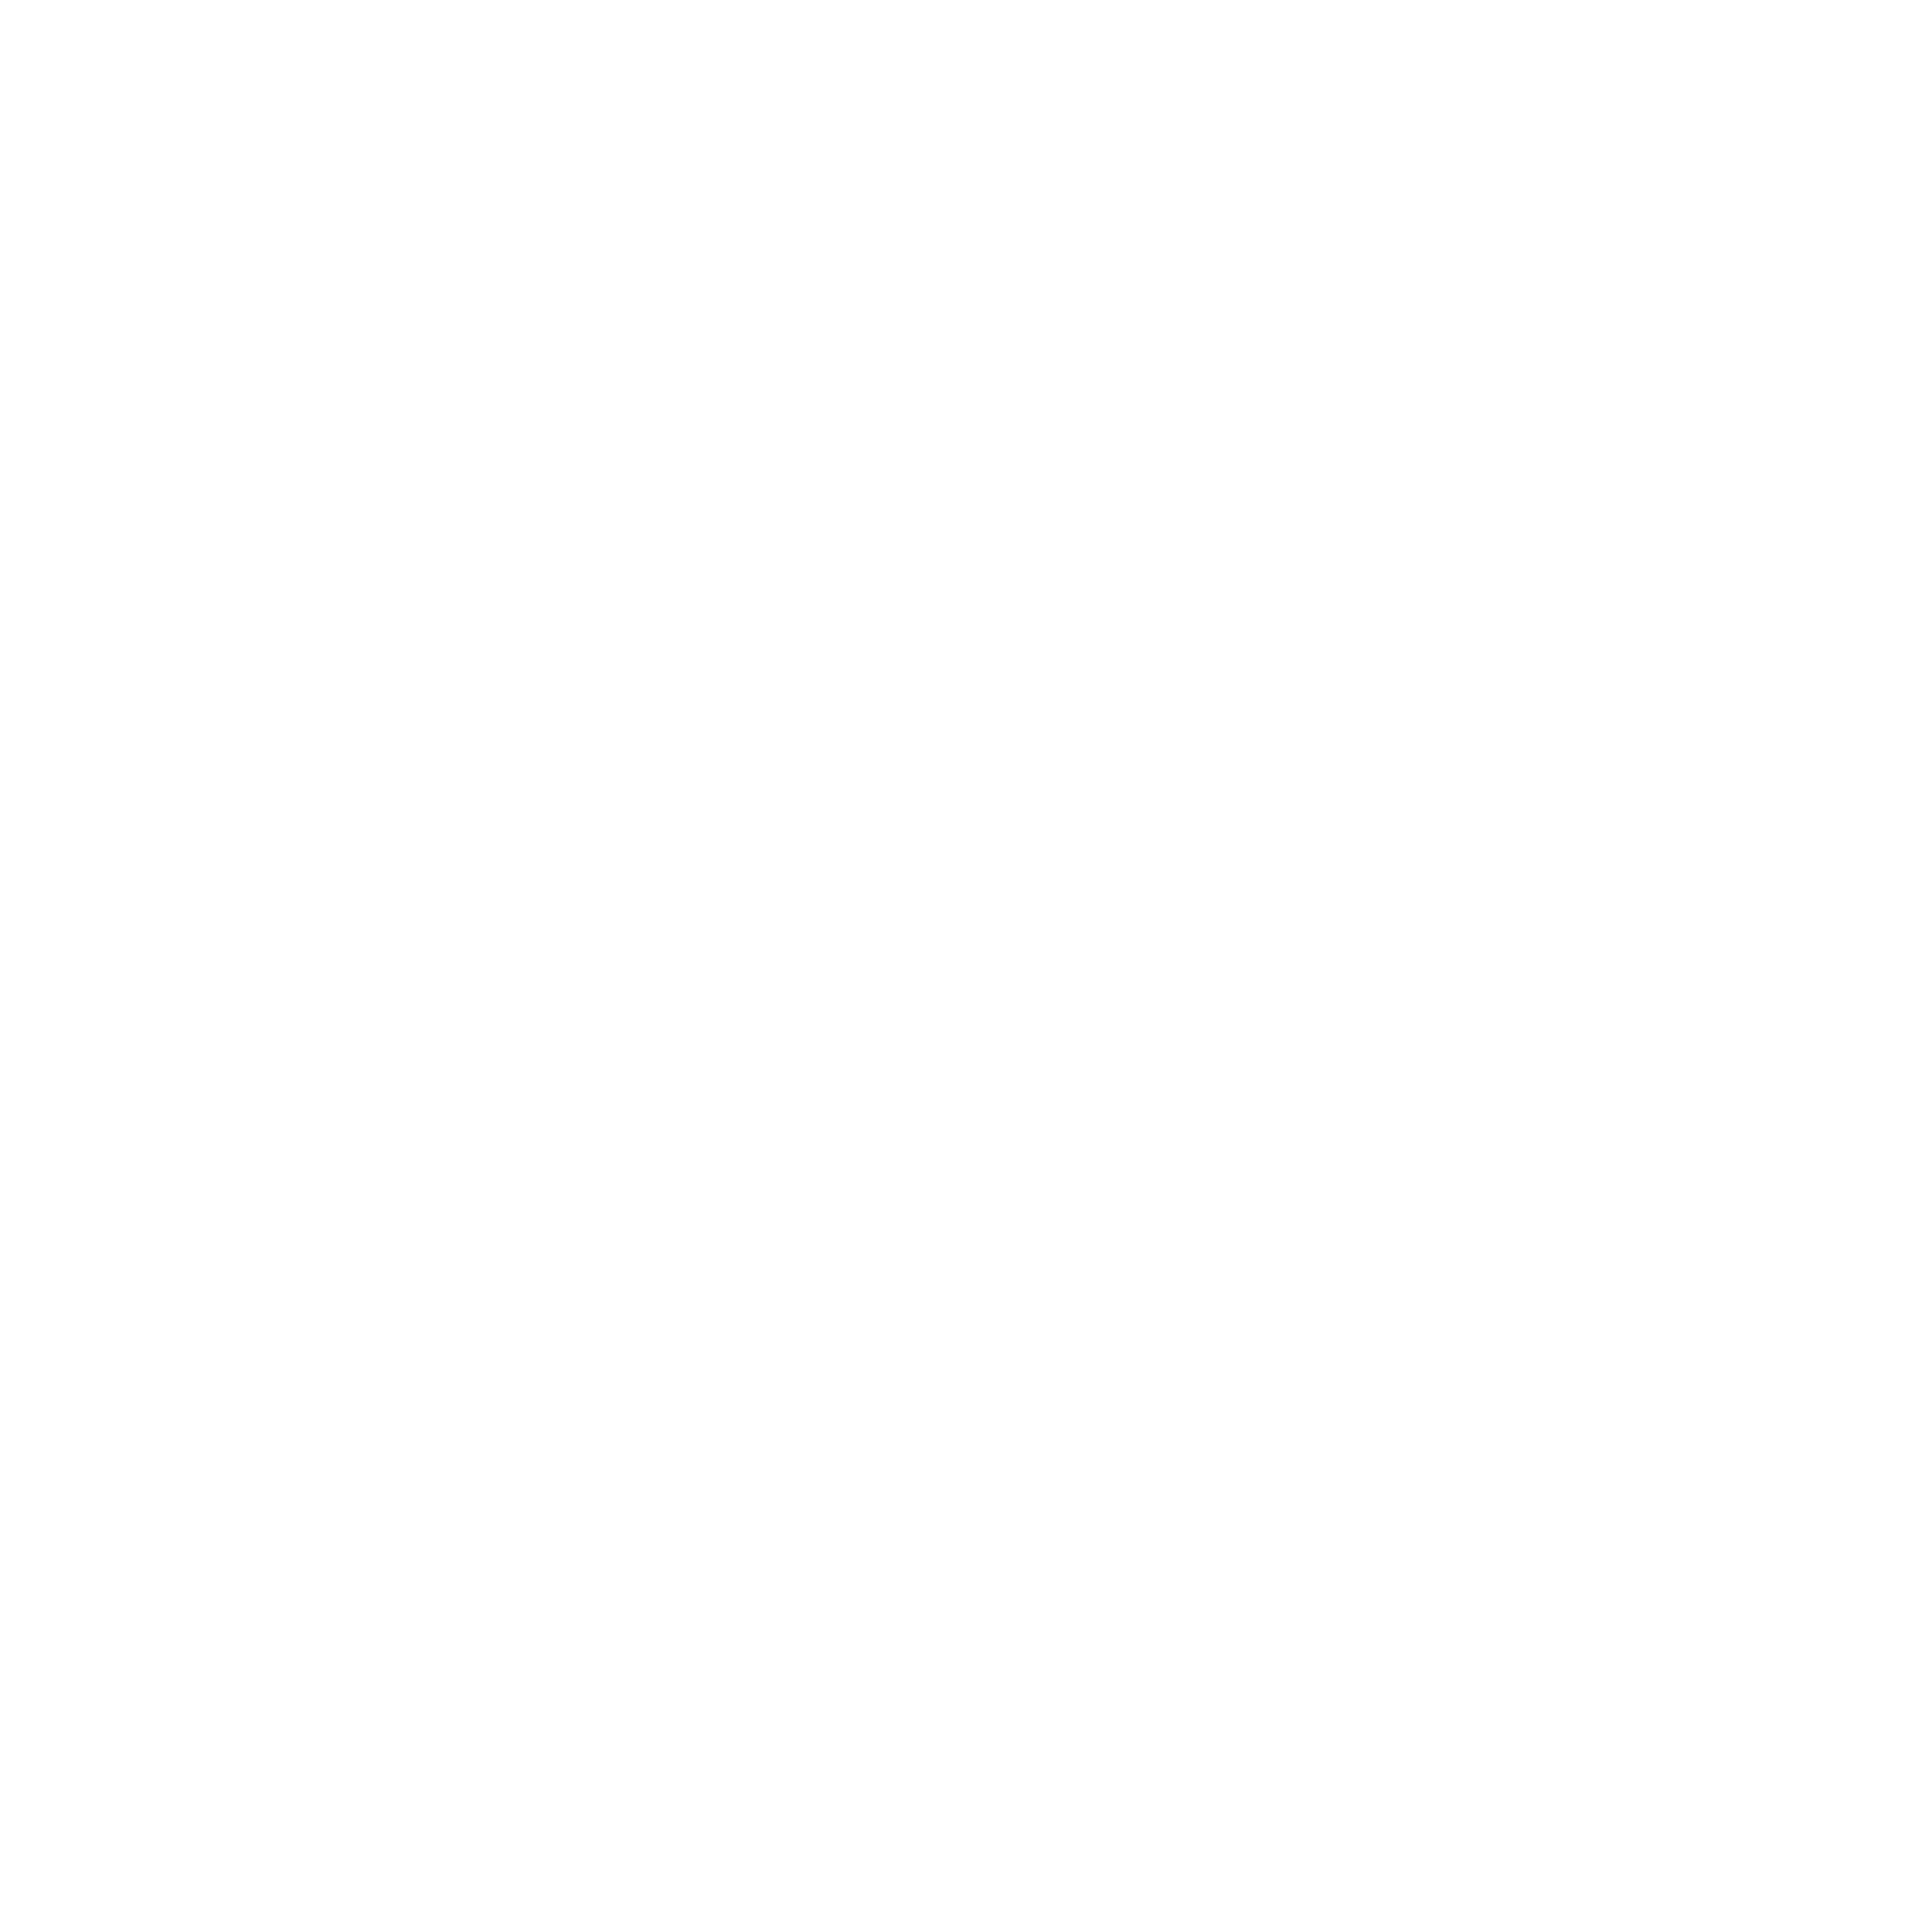

In [38]:
family_stack_plot(event_list=events, wav_dirs=det_dirs, station="ALRZ", channel="EHZ", selfs=selfs, 
                  title='2013sora455868: ALRZ.EHZ', shift=False, pre_pick_plot=0.5, 
                  post_pick_plot=2, post_pick_corr=0.2, spacing_param=0.6,  
                  shift_len=0.05, cc_thresh=0.7, figsize=(10,10), plot_mags=False,
                  savefig='/home/chet/figures/NZ/detection_figs/12-15/det_multiplots/2014sora010105_stack_plots/2014sora010105_Rotokawa_ALRZ_2.5sec_stack.png')